(c) (p) Tshepo Chris Nokeri, Gradient Boosting 

# 2 The Enigma of Decision Trees: An In-Depth Examination into the Sophistication of Tree-Based Learning 

DTs are a variant of ML models that emulate the cognitive processes observed in human decision-making. They are mostly regarded and often applied because they discover sophisticated connections within datasets. A key tool for dataset partitioning and classification based on feature values is available in DTs.  

DTs are key in refining the interpretability and simplicity of ML and can discover sophisticated dynamics in a way that mimics human decision-making, making them resilient and adaptable in several conditions. DTs can decide on sophisticated connections within a dataset because of their hierarchical configuration.  

In [1]:
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set("talk","darkgrid",font_scale=1,font="sans-serif",color_codes=True)
from sklearn import metrics
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
stroke_data = pd.read_csv(r'C:\Users\7069982\Downloads\Notebook_XGBoost\dataset\healthcare-dataset-stroke-data.csv', index_col=[0])
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [3]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


C:\Users\7069982\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


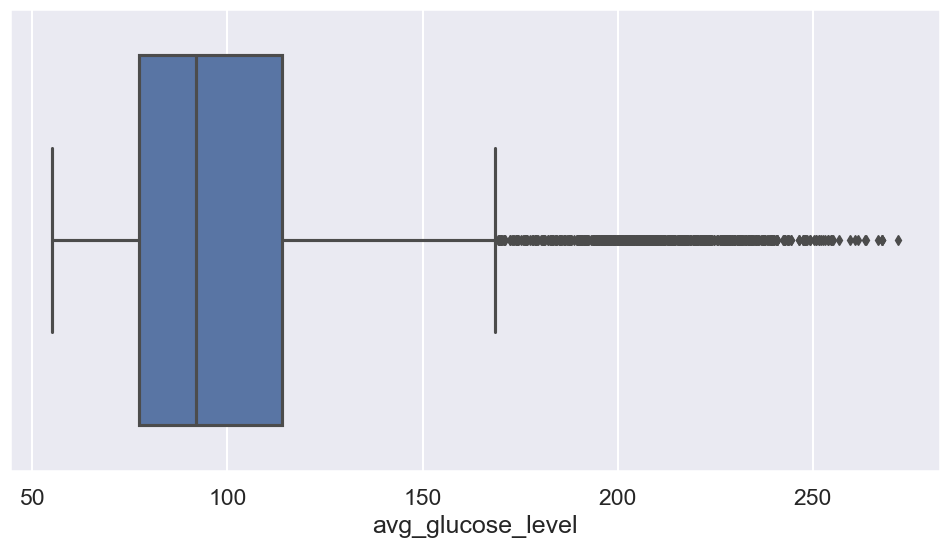

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(stroke_data['avg_glucose_level'])
plt.show()

C:\Users\7069982\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


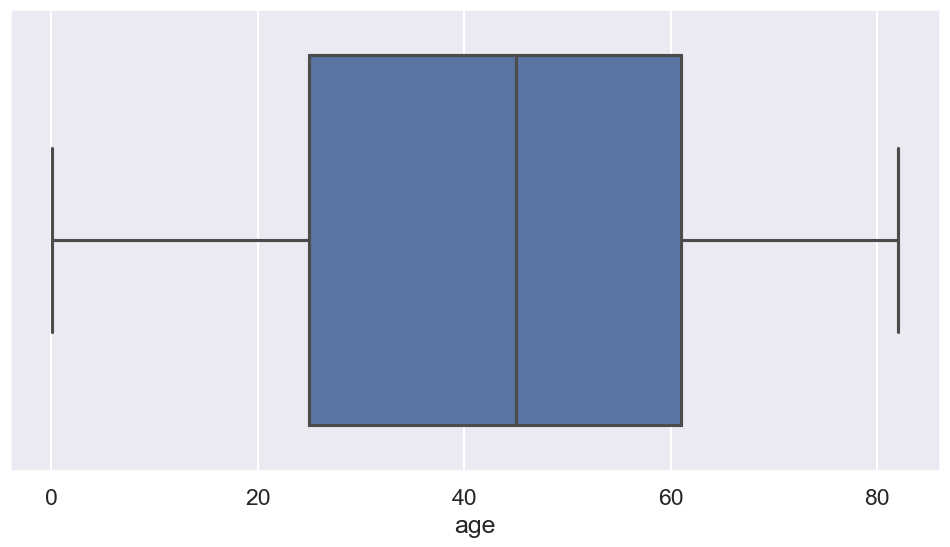

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(stroke_data['age'])
plt.show()

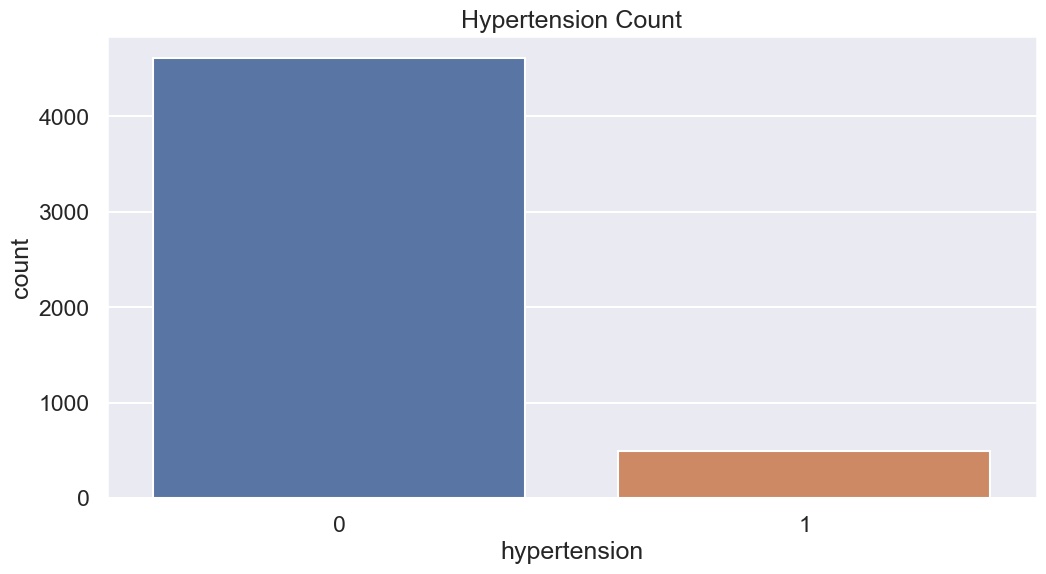

In [6]:
plt.figure(figsize=(12,6))
plt.title('Hypertension Count')
sns.countplot(x=stroke_data['hypertension'])
plt.show()

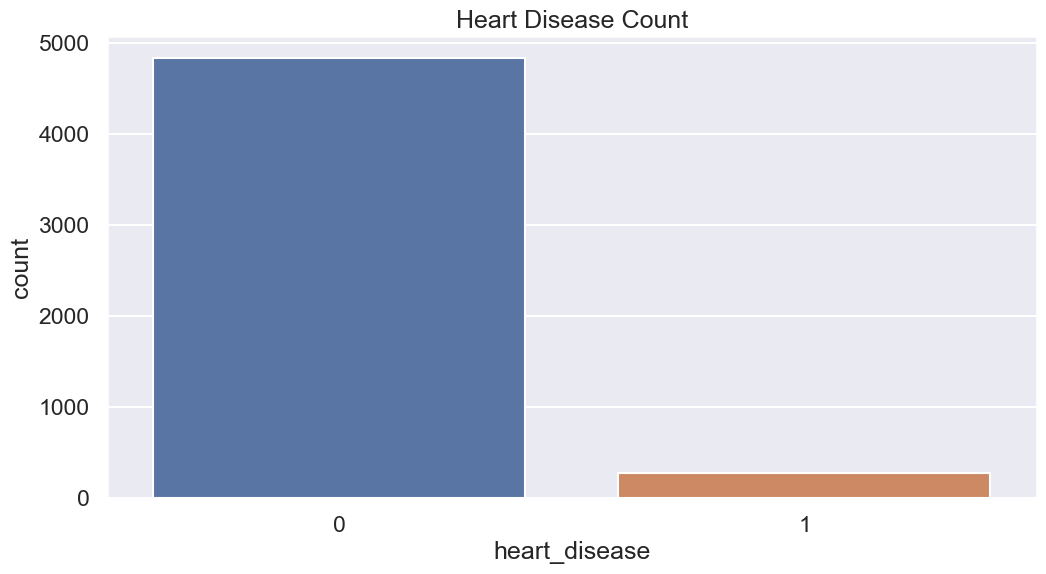

In [7]:
plt.figure(figsize=(12,6))
plt.title('Heart Disease Count')
sns.countplot(x=stroke_data['heart_disease'])
plt.show()

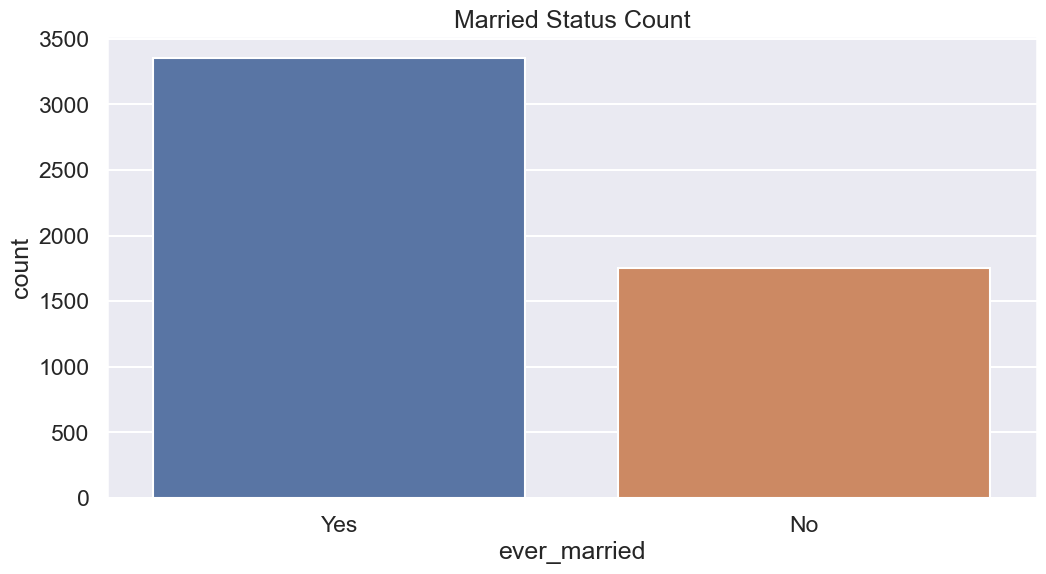

In [8]:
plt.figure(figsize=(12,6))
plt.title('Married Status Count')
sns.countplot(x=stroke_data['ever_married'])
plt.show()

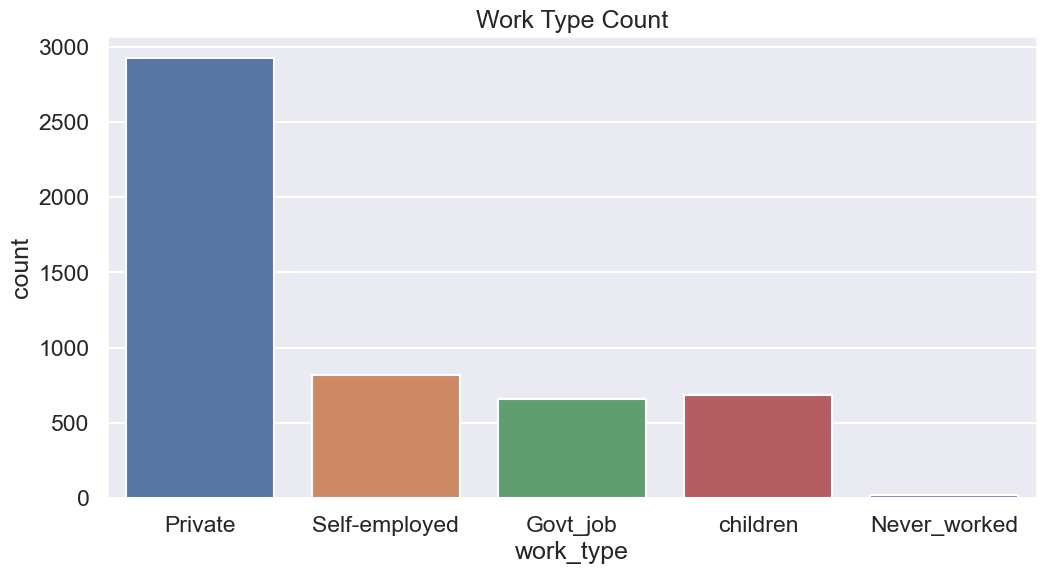

In [9]:
plt.figure(figsize=(12,6))
plt.title('Work Type Count')
sns.countplot(x=stroke_data['work_type'])
plt.show()

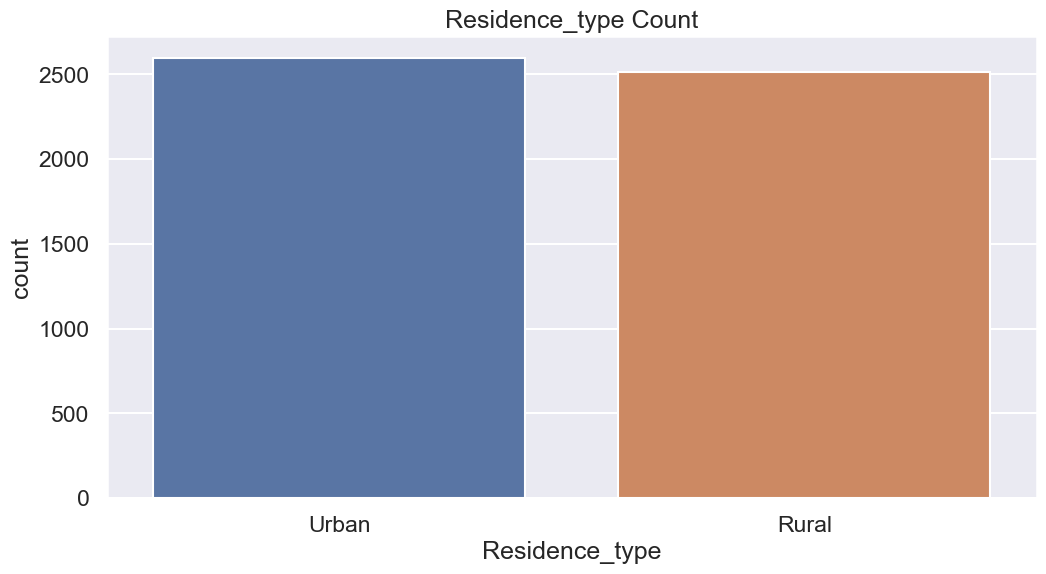

In [10]:
plt.figure(figsize=(12,6))
plt.title('Residence_type Count')
sns.countplot(x=stroke_data['Residence_type'])
plt.show()

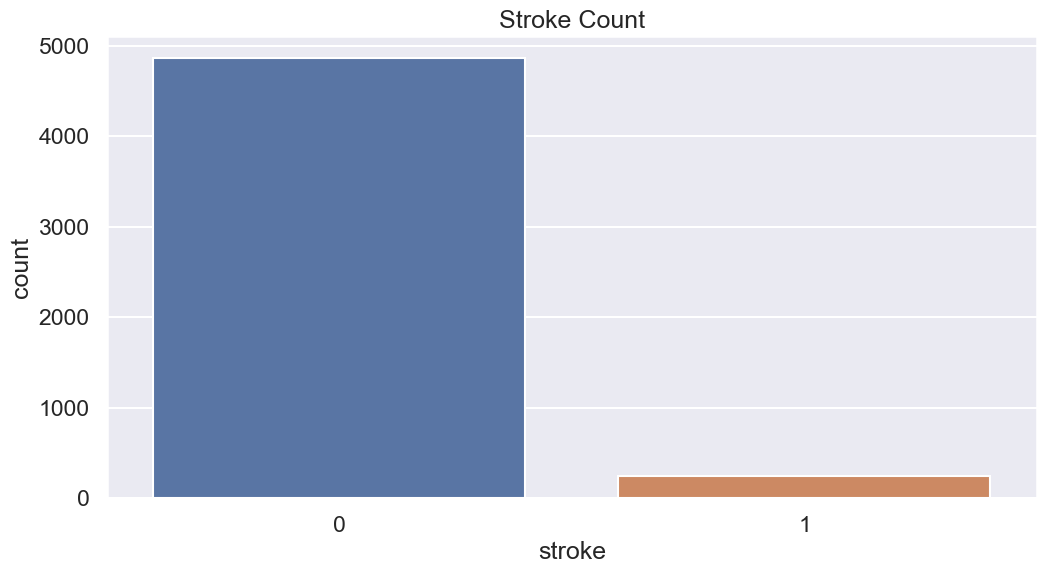

In [11]:
plt.figure(figsize=(12,6))
plt.title('Stroke Count')
sns.countplot(x=stroke_data['stroke'])
plt.show()

In [12]:
stroke_data = pd.read_csv(r'C:\Users\7069982\Downloads\Notebook_XGBoost\dataset\healthcare-dataset-stroke-data.csv')
stroke_data['age'] = np.median(stroke_data['age'].median())
stroke_data['bmi'] = np.median(stroke_data['bmi'].median())

In [13]:
binarized_work_type = pd.get_dummies(stroke_data["work_type"], prefix="work_type", drop_first=True, dtype=int)
binarized_smoking_status = pd.get_dummies(stroke_data["smoking_status"], prefix="smoking_status_", drop_first=True, dtype=int)
binarized_work_type = pd.get_dummies(stroke_data["work_type"], prefix="work_type_", drop_first=True, dtype=int)
stroke_data['gender'] = stroke_data['gender'].map({'Female': 1, 'Male': 0})
stroke_data['ever_married'] = stroke_data['ever_married'].map({'Yes': 1, 'No': 0})
stroke_data['Residence_type'] = stroke_data['Residence_type'].map({'Urban': 1, 'Rural': 0})
stroke_data = pd.concat([binarized_work_type, binarized_smoking_status, binarized_work_type, stroke_data], axis=1)
stroke_data = stroke_data.drop(['gender', 'work_type', 'Residence_type', 'smoking_status'], axis=1)
stroke_data.head()

,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children,smoking_status__formerly smoked,smoking_status__never smoked,smoking_status__smokes,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,0,1,0,0,9046,45.0,0,1,1,228.69,28.1,1
1,0,0,1,0,0,1,0,0,0,1,0,51676,45.0,0,0,1,202.21,28.1,1
2,0,1,0,0,0,1,0,0,1,0,0,31112,45.0,0,1,1,105.92,28.1,1
3,0,1,0,0,0,0,1,0,1,0,0,60182,45.0,0,0,1,171.23,28.1,1
4,0,0,1,0,0,1,0,0,0,1,0,1665,45.0,1,0,1,174.12,28.1,1


# The practical application of the decision tree classification model 

In this section, we will present the practical applications of decision tree classification models, highlighting their versatility and value across various domains. Many people choose to implement DT models due to their simplicity, readability, and capability to handle both numerical and categorical data. Many case studies and instances of decision tree implementations will be examined, optimal strategies for their deployment will be investigated, and the key elements to consider maximizing their performance in practical situations will be highlighted. Through this investigation, the reader will gain an understanding of how decision tree classification models can be used to address intricate problems and make well-informed decisions grounded in factual evidence.

In [14]:
x = stroke_data.iloc[::,0:18]
y = stroke_data.iloc[::,-1]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state = 0)

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred_decision_tree_model =decision_tree_model.predict(x_test)
decision_tree_model_predictions = pd.DataFrame({"Actual_Stroke_Outcomes":y_test, "Predicted_Stroke_Outcomes":y_pred_decision_tree_model})
decision_tree_model_predictions

,Actual_Stroke_Outcomes,Predicted_Stroke_Outcomes
42,1,1
380,0,0
3524,0,0
352,0,0
4927,0,0
...,...,...
472,0,0
4446,0,0
660,0,0
57,1,0


In [19]:

confusion_matrix_decsion_tree_model = pd.DataFrame(confusion_matrix(y_test,y_pred_decision_tree_model), index=["Actual: No Stroke","Actual: With Stroke"],
columns=("Predicted: No Stroke","Predicted: With Stroke"))
confusion_matrix_decsion_tree_model


,Predicted: No Stroke,Predicted: With Stroke
Actual: No Stroke,922,46
Actual: With Stroke,46,8


In [20]:
from sklearn.metrics import classification_report
classification_report_decsion_tree_model = pd.DataFrame(classification_report(y_test, y_pred_decision_tree_model, output_dict=True)).transpose()
classification_report_decsion_tree_model

,precision,recall,f1-score,support
0,0.952479,0.952479,0.952479,968.00000
1,0.148148,0.148148,0.148148,54.00000
accuracy,0.909980,0.909980,0.909980,0.90998
macro avg,0.550314,0.550314,0.550314,1022.00000
weighted avg,0.909980,0.909980,0.909980,1022.00000


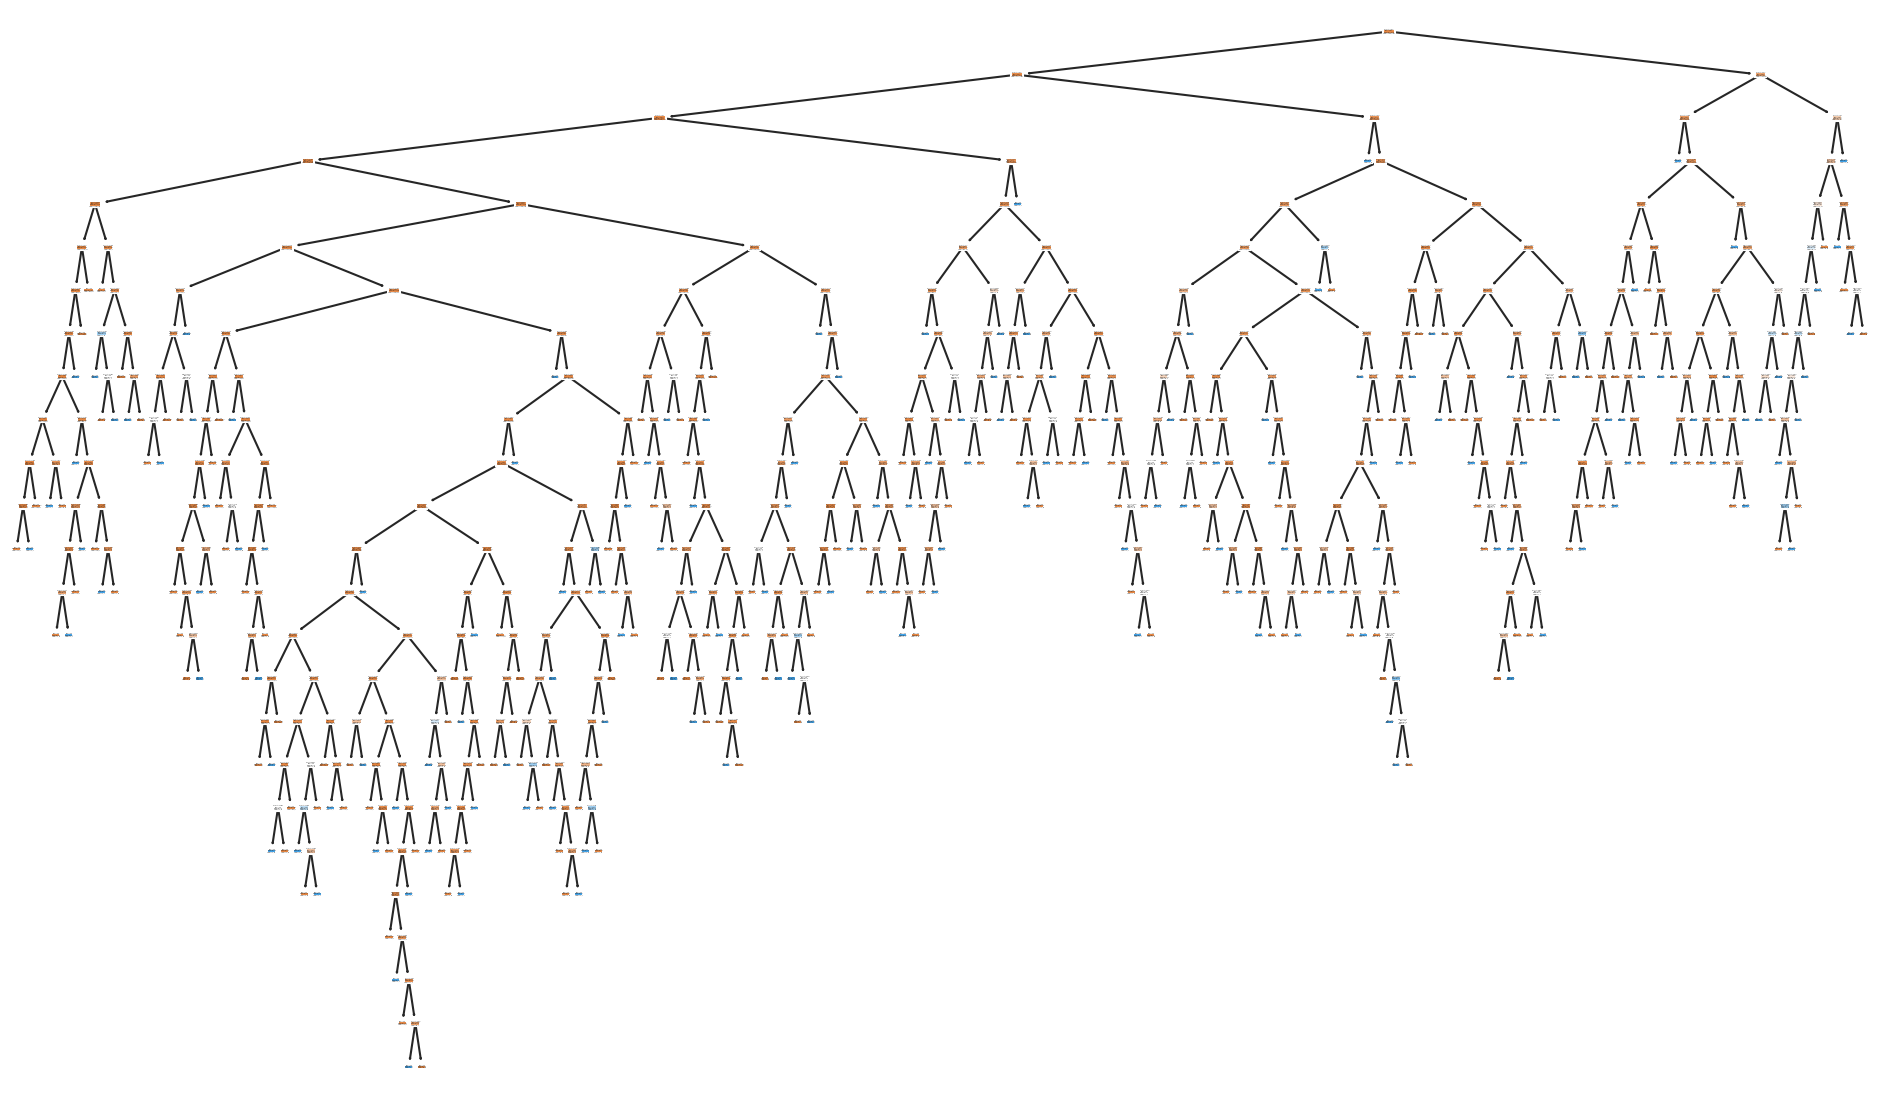

In [21]:
from sklearn import tree
plt.figure(figsize=(24,14))
tree.plot_tree(decision_tree_model, filled=True)
plt.show()

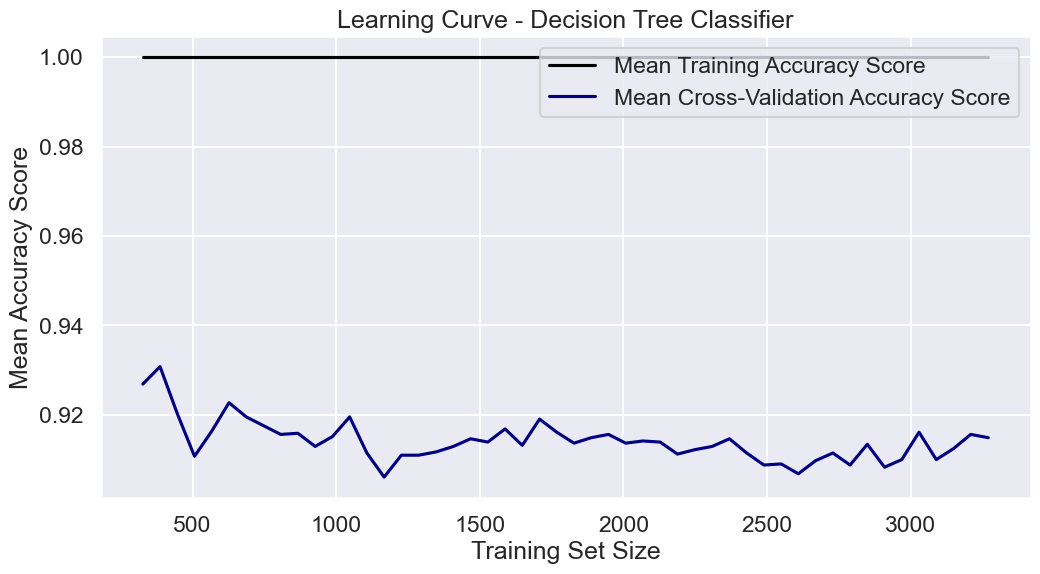

In [22]:
from sklearn.model_selection import train_test_split, learning_curve
trainsize, trainscore, testscore = learning_curve(decision_tree_model,x_train,y_train,cv=5, n_jobs=-5, 
train_sizes=np.linspace(0.1,1.0,50))
trainscore_mean = np.mean(trainscore, axis=1)
trainscore_std = np.std(trainscore,axis=1)
testscore_mean = np.mean(testscore,axis=1)
testscore_std = np.std(testscore,axis=1)
plt.figure(figsize=(12,6))
plt.plot(trainsize,trainscore_mean,color="black",label="Mean Training Accuracy Score")
plt.plot(trainsize,testscore_mean,color="navy",label="Mean Cross-Validation Accuracy Score")
plt.title("Learning Curve - Decision Tree Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Accuracy Score")
plt.legend(loc=1)
plt.show()

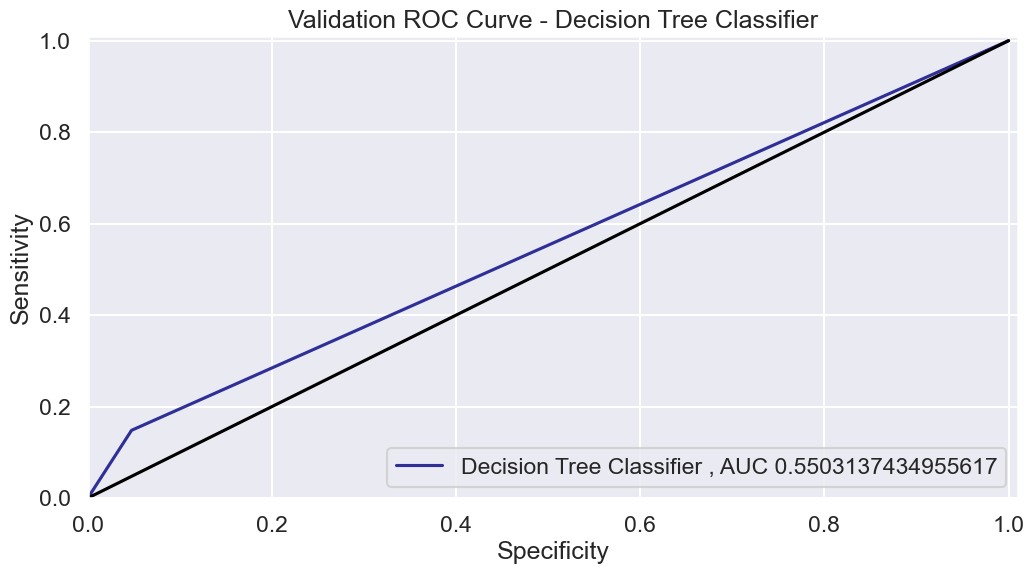

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
y_pred_decision_tree_model_proba = decision_tree_model.predict_proba(x_test)[::,1]
fpr_decision_tree_model, tpr_decision_tree_model, _ = roc_curve(y_test,y_pred_decision_tree_model_proba)
auc_decision_tree_model = roc_auc_score(y_test,y_pred_decision_tree_model_proba)
plt.figure(figsize=(12,6))
plt.plot(fpr_decision_tree_model, tpr_decision_tree_model,label="Decision Tree Classifier , AUC " +str(auc_decision_tree_model), color = "navy",alpha=0.8)
plt.plot([0,1],[0,1],color="black")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.title("Validation ROC Curve - Decision Tree Classifier")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()

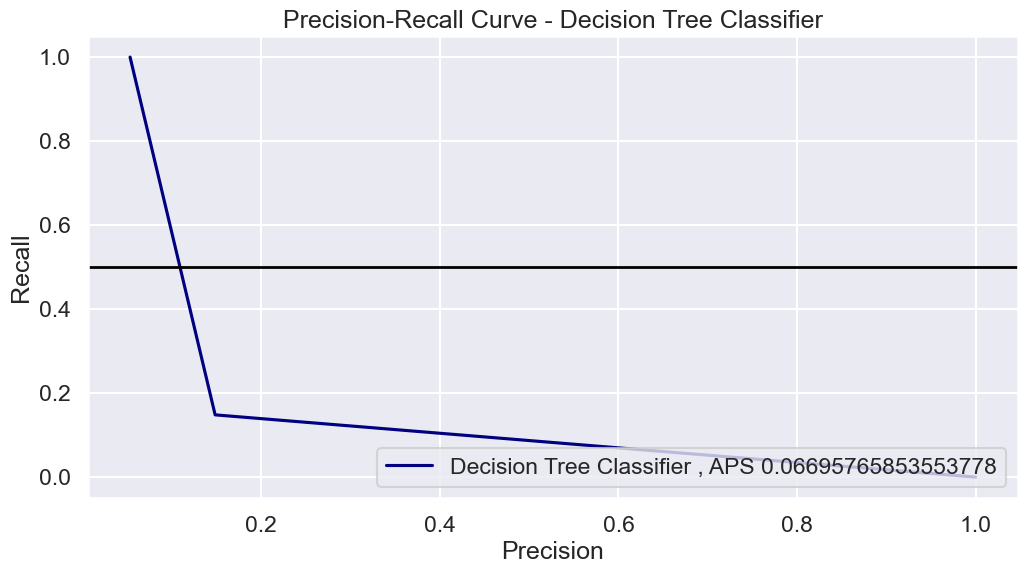

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
precisionrecall_decision_tree_model,recall_decision_tree_model,threshold_decision_tree_model = precision_recall_curve(y_test,y_pred_decision_tree_model)
aps_decision_tree_model = average_precision_score(y_test,y_pred_decision_tree_model)
plt.figure(figsize=(12,6))
plt.plot(precisionrecall_decision_tree_model,recall_decision_tree_model, label = "Decision Tree Classifier , APS " + str(aps_decision_tree_model), 
color="navy")
plt.title("Precision-Recall Curve - Decision Tree Classifier")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=4)
plt.axhline(y=0.5, color="black", lw=2)
plt.show()


# The practical application of the decision tree regression model 

Applying DT regression enables for the prediction of continuous target features. Values that are continuous in nature can be taken on by the target feature. In addition, the model divides the dataset based on the features being explored to minimize fluctuations in the target feature within each partition. By applying the mean value of the dataset points in the leaf node, the DT can make accurate predictions for the continuous value of the input data. DT regression and classification involve the application of DTs to make predictions. Contrasting approaches are taken for different types of features in dataset analysis. Categorical features are solved through classification, while continuous target features are solved by regression models.  

In [25]:
hr_data = pd.read_csv(r"C:\Users\7069982\Downloads\Notebook_XGBoost\dataset\HRDataset_v14.csv")
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [26]:
hr_data = pd.read_csv(r"C:\Users\7069982\Downloads\Notebook_XGBoost\dataset\HRDataset_v14.csv")
hr_data = hr_data.drop(["DOB","Employee_Name", "EmpID", "ManagerName", "ManagerID", "LastPerformanceReview_Date", "DateofTermination", "DateofHire"], axis=1)
binarized_TermReason = pd.get_dummies(hr_data["TermReason"], prefix="TermReason", drop_first=True, dtype=int)
binarized_EmploymentStatus = pd.get_dummies(hr_data["EmploymentStatus"], prefix="EmploymentStatus", drop_first=True, dtype=int)
binarized_Department = pd.get_dummies(hr_data["Department"], prefix="Department", drop_first=True, dtype=int)
binarized_RecruitmentSource = pd.get_dummies(hr_data["RecruitmentSource"], prefix="RecruitmentSource", drop_first=True, dtype=int)
binarized_PerformanceScore = pd.get_dummies(hr_data["PerformanceScore"], prefix="PerformanceScore", drop_first=True, dtype=int)
binarized_Position = pd.get_dummies(hr_data["Position"], prefix="Position", drop_first=True, dtype=int)
binarized_State = pd.get_dummies(hr_data["State"], prefix="State", drop_first=True, dtype=int)
binarized_MaritalDesc = pd.get_dummies(hr_data["MaritalDesc"], prefix="MaritalDesc", drop_first=True, dtype=int)
binarized_Sex = pd.get_dummies(hr_data["Sex"], prefix="Sex", drop_first=True, dtype=int)
binarized_CitizenDesc = pd.get_dummies(hr_data["CitizenDesc"], prefix="CitizenDesc", drop_first=True, dtype=int)
binarized_HispanicLatino = pd.get_dummies(hr_data["HispanicLatino"], prefix="HispanicLatino", drop_first=True, dtype=int)
binarized_RaceDesc = pd.get_dummies(hr_data["RaceDesc"], prefix="RaceDesc", drop_first=True, dtype=int)
hr_data = pd.concat([hr_data, binarized_TermReason, binarized_EmploymentStatus, binarized_Department,
                     binarized_RecruitmentSource, binarized_PerformanceScore, binarized_Position, binarized_State, binarized_MaritalDesc,
                     binarized_Sex, binarized_CitizenDesc, binarized_HispanicLatino, binarized_RaceDesc, binarized_TermReason], axis=1)
hr_data = hr_data.drop(["TermReason", "EmploymentStatus", "Department", "RecruitmentSource", "PerformanceScore",
                        "Position", "State", "MaritalDesc", "Sex", "CitizenDesc", "HispanicLatino", "RaceDesc", "TermReason"], axis=1)

x = hr_data.loc[:, hr_data.columns != 'Salary']
y = hr_data['Salary']



In [27]:

from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state = 0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.tree import DecisionTreeRegressor
tree_regressor_model=  DecisionTreeRegressor()
tree_regressor_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [28]:
y_pred_tree_regressor_model =tree_regressor_model.predict(x_test)
tree_regressor_model_predictions = pd.DataFrame({"Actual_Salary":y_test,
                                                 "Predicted_Salary":y_pred_tree_regressor_model})
tree_regressor_model_predictions

,Actual_Salary,Predicted_Salary
212,108987,100416.0
146,61154,63515.0
225,59472,52057.0
129,63478,60446.0
89,57748,54005.0
...,...,...
135,64995,70131.0
60,65729,71860.0
34,62162,57975.0
216,45998,52177.0


In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
tree_regressor_model_r2_score = pd.Series(r2_score(y_test, y_pred_tree_regressor_model))
tree_regressor_model_mean_squared_error = pd.Series(mean_squared_error(y_test, y_pred_tree_regressor_model))
tree_regressor_model_mean_absolute_error = pd.Series(mean_absolute_error(y_test, y_pred_tree_regressor_model))
tree_regressor_model_performance_results = pd.concat([tree_regressor_model_r2_score, 
                                                      tree_regressor_model_mean_squared_error,
                                                      tree_regressor_model_mean_absolute_error], axis=1)
tree_regressor_model_performance_results.columns = [['R-Squared', 'MSE', 'MAE']]
tree_regressor_model_performance_results

,R-Squared,MSE,MAE
0,0.336787,3.464629e+08,9713.555556


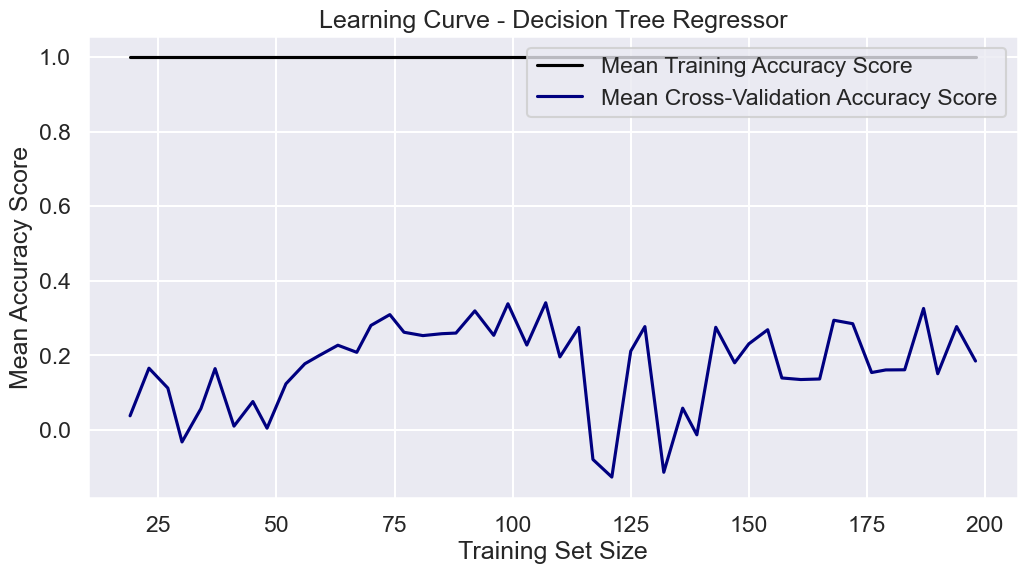

In [30]:
trainsize, trainscore, testscore = learning_curve(tree_regressor_model,x_train,y_train,cv=5, n_jobs=-5, 
train_sizes=np.linspace(0.1,1.0,50))
trainscore_mean = np.mean(trainscore, axis=1)
trainscore_std = np.std(trainscore,axis=1)
testscore_mean = np.mean(testscore,axis=1)
testscore_std = np.std(testscore,axis=1)
plt.figure(figsize=(12,6))
plt.plot(trainsize,trainscore_mean,color="black",label="Mean Training Accuracy Score")
plt.plot(trainsize,testscore_mean,color="navy",label="Mean Cross-Validation Accuracy Score")
plt.title("Learning Curve - Decision Tree Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Accuracy Score")
plt.legend(loc=1)
plt.show()